# Gender Recognition by Voice using Support Vector Machines
Voice samples were collected from the following resources:
1. The Harvard-Haskins Database of Regularly-Timed Speech
2. Telecommunications & Signal Processing Laboratory (TSP) Speech Database at McGill University
3. VoxForge Speech Corpus
4. Festvox CMU_ARCTIC Speech Database at Carnegie Mellon University

The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz. There are in total 21 variables from which 20 is independent variables and 1 is dependent variable that are as follows:

Independent Variables:
1. meanfreq: mean frequency (in kHz)
2. sd: standard deviation of frequency
3. median: median frequency (in kHz)
4. Q25: first quantile (in kHz)
5. Q75: third quantile (in kHz)
6. IQR: interquantile range (in kHz)
7. skew: skewness 
8. kurt: kurtosis 
9. sp.ent: spectral entropy
10. sfm: spectral flatness
11. mode: mode frequency
12. centroid: frequency centroid 
13. meanfun: average of fundamental frequency measured across acoustic signal
14. minfun: minimum fundamental frequency measured across acoustic signal
15. maxfun: maximum fundamental frequency measured across acoustic signal
16. meandom: average of dominant frequency measured across acoustic signal
17. mindom: minimum of dominant frequency measured across acoustic signal
18. maxdom: maximum of dominant frequency measured across acoustic signal
19. dfrange: range of dominant frequency measured across acoustic signal
20. modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

Dependent Variable:
1. label: male or female

### Problem Statement: To identify the voice as male or female  based upon acoustic properties of the voice and speech
Therefore it is a binomial classification problem where target variable has either of the two values i.e. male or female

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Creating dataframe
voice_df=pd.read_csv("voice.csv")
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
voice_df.shape

(3168, 21)

# Exploratory Data Analysis

In [10]:
import sweetviz as sv

In [11]:
voice_data_report=sv.analyze(voice_df)

:FEATURES DONE:                    |█████████████████████| [100%]   00:49  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [12]:
voice_data_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [15]:
#Checking missing values
voice_df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

There are no missing values in the dataset

female    1584
male      1584
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

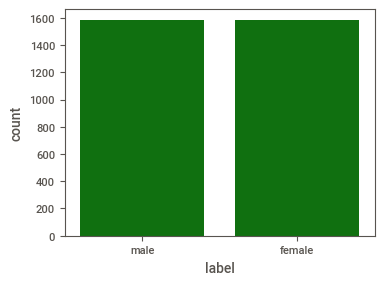

In [21]:
plt.subplots(figsize=(4,3))
print(voice_df['label'].value_counts())
sns.countplot(x= 'label', data=voice_df,color='g')

The dataset is balanced as the values of the target variable label is equally distributed. Thus, we have equal data points for male and female.

### Label Encoding for dependent variable

In [6]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
voice_df['label']=le.fit_transform(voice_df['label'])

female is labeled as 0 and male is labeled as 1

In [7]:
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


<AxesSubplot:>

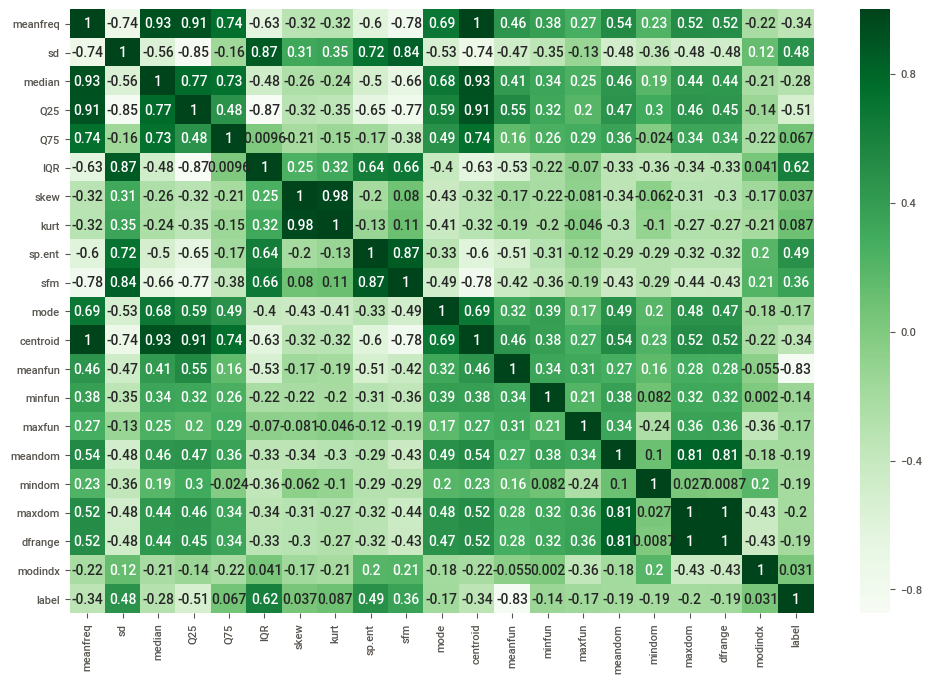

In [32]:
plt.subplots(figsize=(12,8))
sns.heatmap(voice_df.corr(),annot = True,  cmap = 'Greens')

It seems that independent variables does not have much corelation with dependent variable. However, independent variables such as centroid and median, centroid and Q25, meanfreq and Q25, meanfreq and median, skew and kurt has more than 90% corelation with each other 

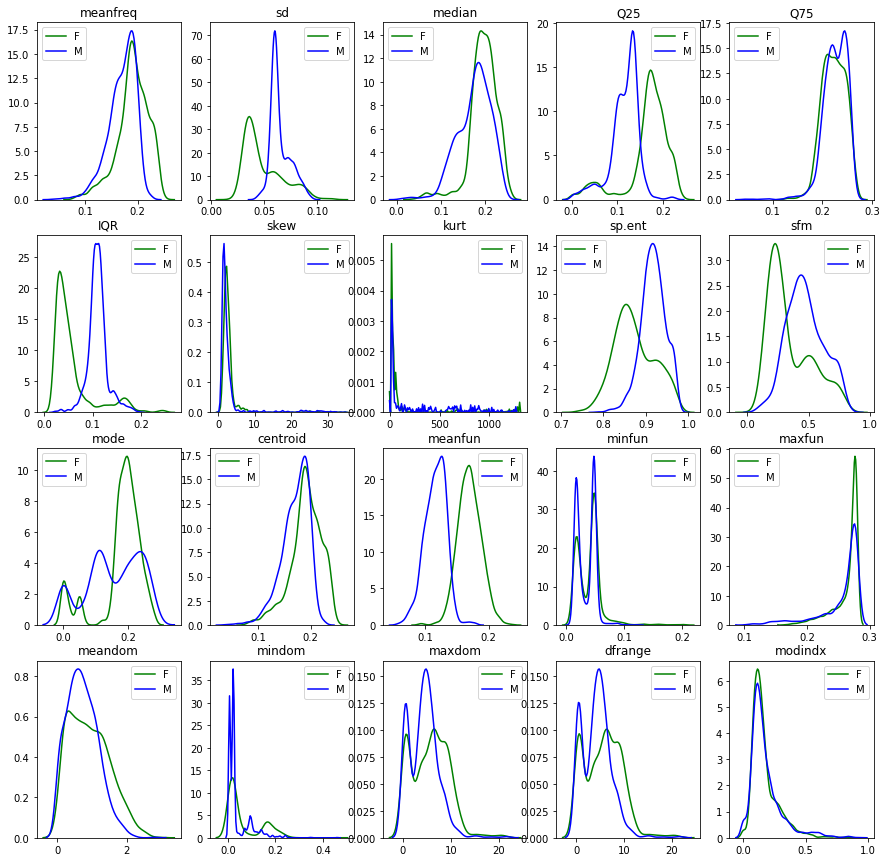

In [9]:
X = voice_df.iloc[:,:-1]
y = voice_df.iloc[:,20]
plt.subplots(4,5,figsize = (15,15))

for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice_df.columns[i-1])
    
    sns.kdeplot(voice_df.loc[y == 0, voice_df.columns[i-1]], color = "green",label = "F")
    sns.kdeplot(voice_df.loc[y == 1, voice_df.columns[i-1]], color = "blue", label = "M")

Summary of the plots
1. Variables Q25, IQR and meanfun has clear separation for male and female voices
2. Variables sd, sp.ent and sfm partially distinguishes the voices of male and female
3. Variables meanfreq, Q75, centroid and modindex has similar distribution for both male and female
4. Remaining variables has higher peak values for male and lower peak values for female and for some of the variables it is vice versa

# -------------------------------- Development Stage ----------------------------------------
To develop the model, 80% of the dataset is used to train the model and 20% of the dataset is used to test the model. The accuracy metric is used to evaluate the performance of the model because dataset is balanced.

In [12]:
#Defining  x and y
X = voice_df.drop('label', axis=1)
y = voice_df['label']

In [25]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

### Feature Scaling
There are so many variables in the dataset with various range of values, so there will be a case where algorithm will give more weightage to features with higher variables. Therefore, scaling the dataset will make the contribution of all the features equal.Here, we are using Standardization to transforms the data between the mean of zero and a standard deviation of 1 using StandardScalar method.

In [14]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.fit_transform(X_test)
X_2 = sc.fit_transform(X)

## Development Stage #1:
In this development stage, support vector machine model is run with the different kernels to find the best accuracy

In [15]:
#SVM run with default parameters
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train2,y_train)
y_pred=svc.predict(X_test2)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


In [16]:
#SVM run with linear kernel
svc=SVC(kernel='linear')
svc.fit(X_train2,y_train)
y_pred=svc.predict(X_test2)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9684542586750788


In [17]:
#SVM run with RBF kernel
svc=SVC(kernel='rbf')
svc.fit(X_train2,y_train)
y_pred=svc.predict(X_test2)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


In [18]:
#SVM run with polynomial kernel
svc=SVC(kernel='poly')
svc.fit(X_train2,y_train)
y_pred=svc.predict(X_test2)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9495268138801262


#### Insights from Development Stage 1:
1. By default SVM model is using rbf kernel in this project because the accuracy of rbf kernel and default parameter model is same i.e. 97.63%
2. SVM run with polynomial kerrnel is giving less accuracy, this might be because it is overfitting the model
3. Thus, we can conclude that model with rbf kernel and default parameter is giving the best accuracy
    

## Development Stage #2:
In this stage, cross validation is perform on the model to improve the model performance.The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it. The k fold cross validation is used  with cv=10, so the dataset is splitted into 10 equal parts thus covering all the data into training as well into testing set.

In [19]:
#Importing libraries for cross validation
from sklearn.model_selection import cross_val_score

In [23]:
#cross validation on linear kernel
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X_2, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print("Cross Validation Accuracy: ",scores.mean())

[0.91194969 0.97169811 0.97169811 0.97169811 0.96202532 0.98734177
 0.99050633 0.98101266 0.95253165 0.99367089]
Cross Validation Accuracy:  0.9694132632752168


In [22]:
#cross validation on rbf kernel
svc=SVC(kernel='rbf')
scores=cross_val_score(svc,X_2,y,cv=10,scoring='accuracy') 
print(scores)
print("Cross Validation Accuracy: ",scores.mean())

[0.93396226 0.95597484 0.96855346 0.9591195  0.96835443 0.99683544
 0.98734177 0.98101266 0.91455696 0.99367089]
Cross Validation Accuracy:  0.9659382214791815


In [84]:
#cross validation on polynomial kernel
svc=SVC(kernel='poly')
scores=cross_val_score(svc,X_2,y,cv=10,scoring='accuracy') 
print(scores)
print("Cross Validation Accuracy: ",scores.mean())

[0.89937107 0.94654088 0.93081761 0.91509434 0.95886076 1.
 0.98101266 0.96835443 0.87974684 0.9778481 ]
Cross Validation Accuracy:  0.9457646684181196


#### Insights from Development Stage #2:
1. When K-fold cross validation is done we can see different score in each iteration.This happens because the dataset get split in random manner into testing and training dataset.Thus it depends on how the dataset got split and which samples are training set and which samples are in testing set.
2. Here, linear kernel is giving best accuracy compare to other two kernels rbf and polynomial

## Development Stage #3:
Grid Search Technique is used to find the best parameters. Because apart from kernel, Support Vector machine has C, degree and gamma parameters.The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example.The gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points. The degree parameter is used in poylnomial kernel to set degree such that model does not get overfit or underfit.

In [88]:
svm_model= SVC()
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [89]:
from sklearn.model_selection import GridSearchCV
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [90]:
#training accuracy
model_svm.fit(X_train2, y_train)
print(model_svm.best_score_)

0.9573796369376479


In [91]:
#display best parameters
print(model_svm.best_params_)

{'C': 0.9, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}


In [93]:
#testing accuracy
y_pred= model_svm.predict(X_test2)
print(metrics.accuracy_score(y_pred,y_test))

0.9479495268138801


#### Insight from development stage #3:
Grid search cv is performing good for both training and test data. So it is a good model with the selected parameters values

# Conclusion

The best accuracy model is the rbf kernel model that is run in the development stage #1. 

In [31]:
#SVM run with RBF kernel
svc_final=SVC(kernel='rbf')
svc_final.fit(X_train2,y_train)
y_pred=svc_final.predict(X_test2)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


I would recommend to use this model, because it is simple model and adding cross validation and hyperparameters increases the complexity of the model and thus reduces the accuracy of the model. As it is simple binomial problem with equal distribution of the classes, this SVM model is giving 98% accuracy which is very good. Thus, model identifies the voice of male and female 98% of the time. 